In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
X1=np.random.normal(0,1,100)
X2=np.random.normal(0,1,100)
Y=np.array([0]*90+[1]*10)

df=pd.DataFrame(np.vstack((X1,X2,Y)).transpose(), columns=['X1','X2','Y'])
df.head()

,X1,X2,Y
0,-1.597774,-0.599741,0.0
1,0.863998,1.398610,0.0
2,0.242142,-0.417350,0.0
3,-0.375268,-0.996809,0.0
4,-0.036434,-0.735421,0.0


In [3]:
df.Y.value_counts()

0.0    90
1.0    10
Name: Y, dtype: int64

In [4]:
X=df[['X1','X2']].values
Y=df['Y'].values

X.shape, Y.shape

((100, 2), (100,))

- $X \in \mathbf R^{n \times d}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $d$-dimensional random vector (`This is a prior information that` $\theta$ `follows normal distribution`)
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

$ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

$ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

$ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

$ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

$\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

In [5]:
def logistic(X):
    return 1/(1+np.exp(-X))

def gradient(X,Y,theta):
    return -(np.transpose(X)@Y-np.transpose(X)@logistic(X@theta))

def get_loss(X,Y,theta):
    return -(np.transpose(Y)@X@theta-sum(np.log(1+np.exp(X@theta))))

def logistic_regression(X,Y,alpha,n_iterations):
    
    THETA=[]
    COSTS=[]
    theta=np.random.normal(0,1,X.shape[1])*0.01
    
    for n_iter in range(n_iterations):
        
        dtheta=gradient(X,Y,theta)
        theta=theta-alpha*dtheta
        
        cost=get_loss(X,Y,theta)
        
        THETA.append(theta)
        COSTS.append(cost)
    
    return THETA, COSTS

alpha=10E-3
n_iterations=100
THETA, COSTS=logistic_regression(X,Y,alpha,n_iterations)

THETA[-1], COSTS[-1]

(array([ 0.36010186, -0.05220781]), 67.95925082108562)

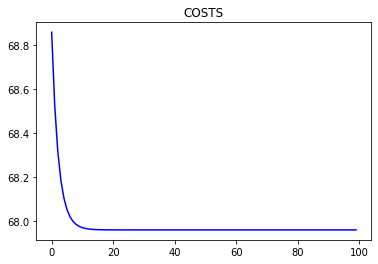

In [6]:
plt.title('COSTS')
plt.plot(COSTS,c='b')
plt.show()